In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
import random
import math
import pickle
from tqdm.notebook import tqdm_notebook
import sys
import scipy
from scipy.optimize import curve_fit
import torch
import torch.nn as nn
import torch.nn.functional as F
sys.path.append('../')
import fn

In [3]:
%load_ext autoreload
%autoreload 2

## Testing results locally

In [186]:
import addition_data
import addition_eval
from LSTM import LSTM
import time

In [192]:
with open('../pickles/carry_tables/all_tables_d1_b2-6.pickle', 'rb') as f:
    all_tables = pickle.load(f)

In [461]:
b = 5
tables = all_tables[b]

In [462]:
table = tables[((0,)*b,)*b]

In [466]:
training_dataloader, testing_dataloader = addition_data.prepare(b, 6, table, batch_size=125, split_type='OOD', split_depth=3, sample=True)

In [467]:
model = LSTM(b, 1)
loss, training_acc, testing_acc = addition_eval.eval(
    model, training_dataloader, testing_dataloader, lr=0.04,
    num_passes=1000, log_interval=10, print_loss_and_acc=True
)

t = 0
loss = 1.544929, training_acc = 0.000, testing_acc = 0.000

t = 100
loss = 0.697971, training_acc = 0.032, testing_acc = 0.008

t = 200
loss = 0.171599, training_acc = 0.880, testing_acc = 0.552

t = 300
loss = 0.064736, training_acc = 0.976, testing_acc = 0.864

t = 400
loss = 0.039416, training_acc = 0.976, testing_acc = 0.968

t = 500
loss = 0.026072, training_acc = 0.984, testing_acc = 0.976

t = 600
loss = 0.013939, training_acc = 0.992, testing_acc = 0.912

t = 700
loss = 0.012859, training_acc = 1.000, testing_acc = 0.968

t = 800
loss = 0.023328, training_acc = 0.984, testing_acc = 0.920

t = 900
loss = 0.006686, training_acc = 1.000, testing_acc = 0.992



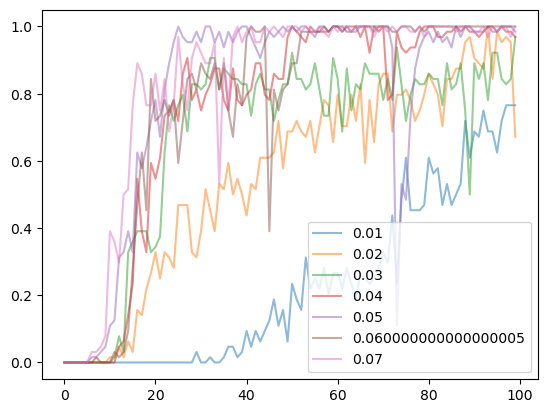

In [323]:
for lr, testing_acc in test_acc_vs_lr.items():
    plt.plot(testing_acc, alpha=0.5, label=lr)
plt.legend()

For b=3, lr=0.02,0.04 achieved fastest results (w/ batch_size=16)

For b=4, lr= (w/ batch_size=64)

## Plot Learning Rates

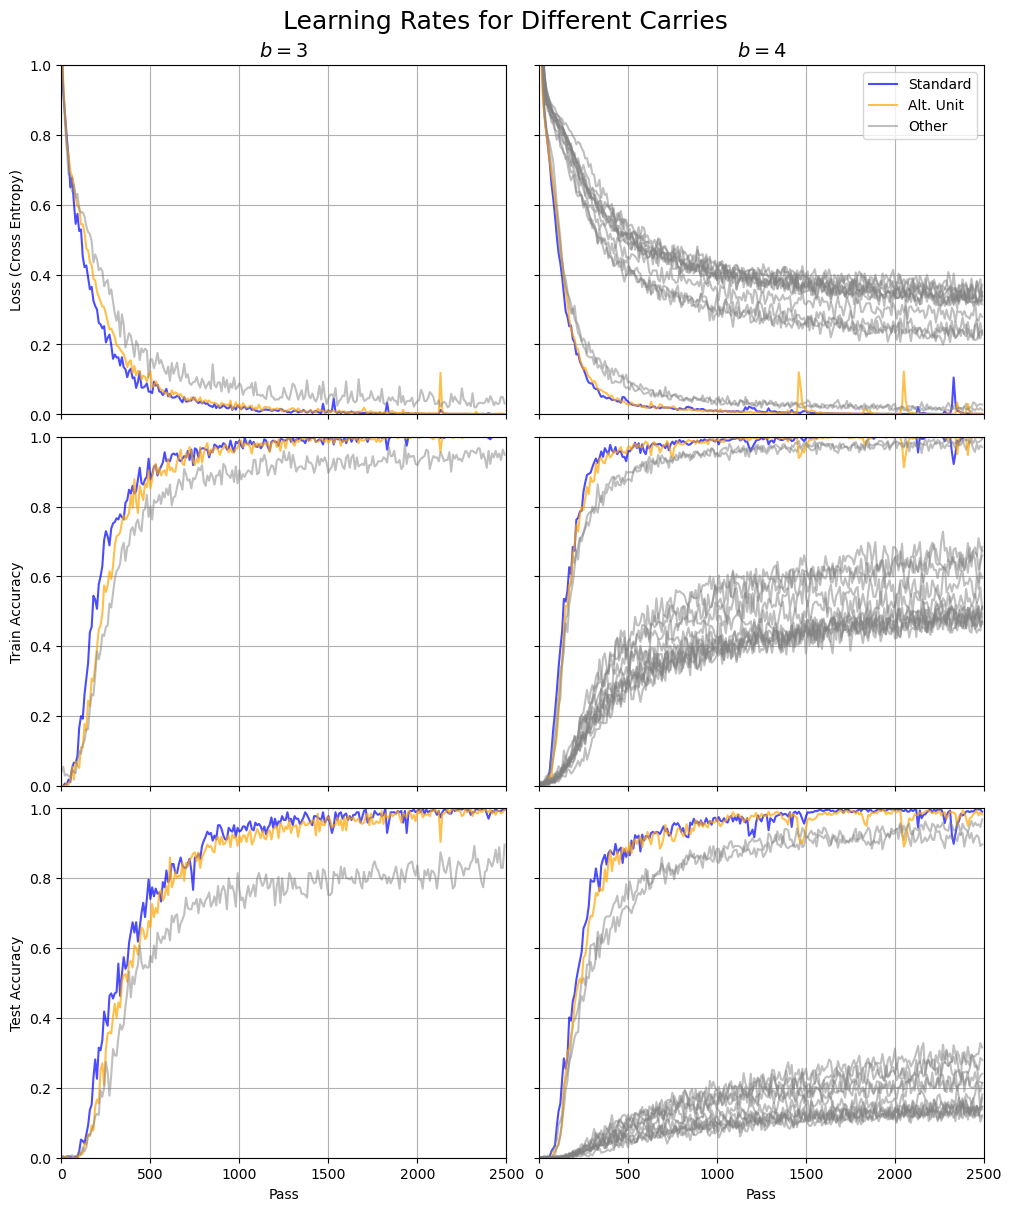

In [452]:
# create subplots, title figure
fig, axes = plt.subplots(3, 2, figsize=(10, 12), constrained_layout=True, sharex=True, sharey=True)
fig.suptitle('Learning Rates for Different Carries', fontsize=18)

for i in range(2):
    for j in range(3):

        # get b, learning rates
        b = i + 3
        with open(f'../pickles/learning_metrics/learning_metrics{b}_10trials.pickle', 'rb') as f:
            learning_metrics = pickle.load(f)

        # get ax, set basic formatting
        ax = axes[j, i]
        ax.grid(True)
        ax.set_xlim(0, 250)
        ax.set_ylim(0)
        ax.set_xticks(np.linspace(0, 250, 6), np.linspace(0, 2500, 6).astype('int'))

        # loss plot
        if j == 0:
            ax.set_title(f'$b = {b}$', fontsize=14)
            for dc in learning_metrics.keys():
                loss = learning_metrics[dc]['loss']
                if (np.array(dc) == 0).all():
                    std, = ax.plot(loss, color='blue', alpha=0.7, label='Standard')
                elif len(np.unique(all_tables[b][dc])) == 2:
                    alt_unit, = ax.plot(loss, color='orange', alpha=0.7, label='Alt. Unit')
                else:
                    other, = ax.plot(loss, color='grey', alpha=0.5, label='Other')
            if i == 0:
                ax.set_ylabel('Loss (Cross Entropy)')
            elif i == 1:
                ax.legend(handles=[std, alt_unit, other])
    
        # training accuracy plot
        if j == 1:
            for dc in learning_metrics.keys():
                train_acc = learning_metrics[dc]['training_acc']
                if (np.array(dc) == 0).all():
                    ax.plot(train_acc, color='blue', alpha=0.7, label='Standard')
                elif len(np.unique(all_tables[b][dc])) == 2:
                    ax.plot(train_acc, color='orange', alpha=0.7, label='Alt. Unit')
                else:
                    ax.plot(train_acc, color='grey', alpha=0.5, label='Other')
            if i == 0:
                ax.set_ylabel('Train Accuracy')
    
        # testing accuracy plot
        if j == 2:
            for dc in learning_metrics.keys():
                test_acc = learning_metrics[dc]['testing_acc']
                if (np.array(dc) == 0).all():
                    ax.plot(test_acc, color='blue', alpha=0.7, label='Standard')
                elif len(np.unique(all_tables[b][dc])) == 2:
                    ax.plot(test_acc, color='orange', alpha=0.7, label='Alt. Unit')
                else:
                    ax.plot(test_acc, color='grey', alpha=0.5, label='Other')
            ax.set_xlabel('Pass')
            if i == 0:
                ax.set_ylabel('Test Accuracy')
    plt.savefig('../figures/learning_rates.png', dpi=300)

## Correlate with box-counting dimension

### Plot box-counting dimension

In [1370]:
with open('../pickles/carry_tables/all_tables_d1.pickle', 'rb') as f:
    all_tables = pickle.load(f)

In [349]:
with open('../pickles/complexity_measures/est_dim_box_vs_depth.pickle', 'rb') as f:
    est_dim_box_vs_depth = pickle.load(f)

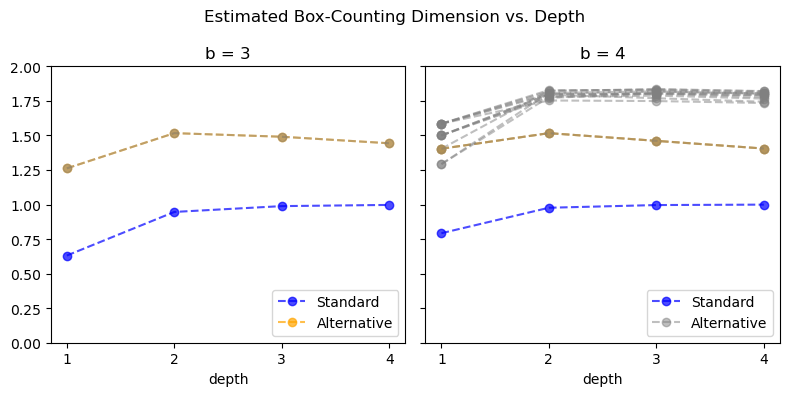

In [350]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
for i in range(len(axes)):
    ax = axes[i]
    tables = all_tables[i+3]
    for dc in tables.keys():
        if (np.array(dc) == 0).all():
            ax.plot(est_dim_box_vs_depth[i+3][dc], color='blue', alpha=0.7, marker='o', linestyle='--', label='Standard')
        elif len(np.unique(tables[dc])) == 2:
            ax.plot(est_dim_box_vs_depth[i+3][dc], color='orange', alpha=0.7, marker='o', linestyle='--', label='Alt. Unit')
        else:
            ax.plot(est_dim_box_vs_depth[i+3][dc], color='grey', alpha=0.5, marker='o', linestyle='--', label='Other')
        ax.set_xticks([0, 1, 2, 3], [1, 2, 3, 4])
        ax.set_xlabel('depth')
        ax.set_yticks(np.linspace(0, 2, 9))
    if (i == 3):
        ax.set_ylabel('est. box-counting dim.')
    ax.set_title('b = '+str(i+3))
    ax.legend(labels=['Standard', 'Alternative'], loc='lower right')
fig.suptitle('Estimated Box-Counting Dimension vs. Depth')
plt.tight_layout()

### Fit sigmoid function to accuracy curves

In [331]:
def acc(x, a, b, c):
    return a / (1 + np.exp(-b * (x - c)))

In [ ]:
x = np.arange(250)
dc = ((0,) * 3,) * 3
y = learning_metrics[dc]['testing_acc']
(a, b, c), cov = curve_fit(acc, x, y)

In [ ]:
plt.plot(y, color='blue', alpha=0.7, label='Testing Accuracy')
plt.plot(acc(x, a, b, c), color='orange', alpha=0.7, label=r'Best-fit $\sigma$')
plt.axvline(c, color='grey', alpha=0.5, linestyle='--')
plt.text(c+3, 0.1, '$c$')
plt.text(170, 0.2, r'$\sigma(x) = \dfrac{a}{1+e^{-b(x-c)}}$')
plt.legend()
plt.xticks(np.linspace(0, 250, 6), np.linspace(0, 2500, 6).astype('int'))
plt.xlabel('Pass')
plt.ylabel('Accuracy')
plt.title('Fitting a Sigmoid Function to the Accuracy Curve')
plt.show()

### Correlate accuracy curve inflection point with box-counting dimension

In [357]:
est_dim_box_vs_depth[4][((0, 0, 0, 0), (0, 0, 3, 1), (0, 3, 0, 1), (0, 1, 1, 2))][3]

1.7919237943367405

In [404]:
all_est_dims = []
all_critical_pts = []

for b in range(3, 5):
    x = np.arange(250)
    with open(f'../pickles/learning_metrics/learning_metrics{b}_10trials.pickle', 'rb') as f:
        learning_metrics = pickle.load(f)
    est_dims = [est_dim_box_vs_depth[b][dc][3] for dc in all_tables[b].keys()]
    critical_pts = []
    for dc in all_tables[b].keys():
        y = learning_metrics[dc]['testing_acc']
        try:
            (a, b, c), cov = curve_fit(acc, x, y)
        except:
            print(b, dc)
            c = -1
        critical_pts.append(c)
    all_est_dims += est_dims
    all_critical_pts += critical_pts

0.1545649022707177 ((0, 0, 0, 0), (0, 0, 3, 1), (0, 3, 0, 1), (0, 1, 1, 2))
0.09886715993380389 ((0, 0, 0, 0), (0, 3, 1, 0), (0, 1, 2, 1), (0, 0, 1, 3))
0.03893885430024382 ((0, 0, 0, 0), (0, 2, 2, 0), (0, 2, 0, 2), (0, 0, 2, 2))
0.03836314932613841 ((0, 0, 0, 0), (0, 1, 1, 2), (0, 1, 2, 1), (0, 2, 1, 1))


In [405]:
valid = lambda x: x > 0
valid_pairs = [(crit_pt, est_dim) for crit_pt, est_dim in zip(all_critical_pts, all_est_dims) if valid(crit_pt)]

In [406]:
all_critical_pts = [crit_pt for crit_pt, est_dim in valid_pairs]
all_est_dims = [est_dim for crit_pt, est_dim in valid_pairs]

Text(0, 0.5, 'critical point of sigmoid fit')

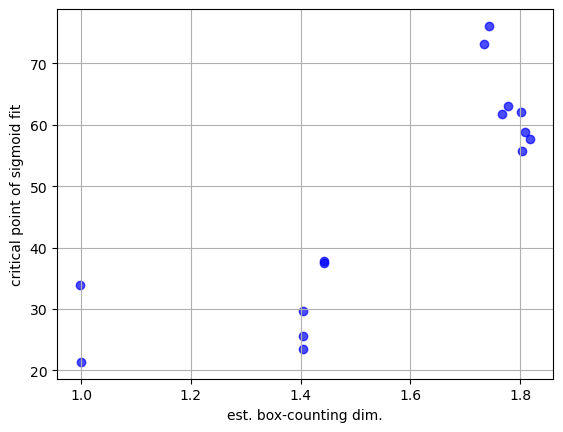

In [460]:
plt.scatter(all_est_dims, all_critical_pts, color='blue', alpha=0.7)
# plt.xticks(np.linspace(1, 2, 5))
# plt.yticks(np.linspace(0, 150, 6))
plt.grid(True)
plt.xlabel('est. box-counting dim.')
plt.ylabel('critical point of sigmoid fit')

In [403]:
scipy.stats.spearmanr(all_est_dims, all_critical_pts)

SignificanceResult(statistic=0.6834149431758018, pvalue=0.004972634730447582)

## Test stability of learning rates

In [159]:
import addition_data
import addition_eval
from LSTM import LSTM

In [160]:
b = 3
tables = all_tables[b]

In [161]:
table = tables[((0, 0, 0),
                (0, 0, 0),
                (0, 0, 0))]

In [206]:
test_stable = {}
for i in tqdm_notebook(range(5)):
    model = LSTM(b, 1)
    training_dataloader, testing_dataloader = addition_data.prepare(b, 6, table, batch_size=16, split_type='OOD', split_depth=3, sample=True)
    losses, training_accs, testing_accs = addition_eval.eval(model, training_dataloader, testing_dataloader, num_passes=1000, print_loss_and_acc=False)
    metrics = {'loss': losses, 'training_acc': training_accs, 'testing_acc': testing_accs}
    test_stable[i] = metrics

  0%|          | 0/5 [00:00<?, ?it/s]

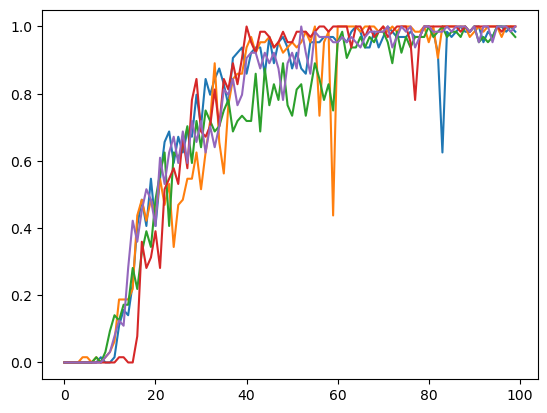

In [207]:
for i in test_stable.keys():
    plt.plot(test_stable[i]['testing_acc'])

## Try deterministic dataset[x]

In [172]:
from addition_data import BaseAddition

In [181]:
dataset = BaseAddition(table, 3, None)